# Scotch Whiskies Data Analysis

# Problem statement
Provide meaningful insights, e.g.:
- What interesting information user can find in the dataset?
- Choose whisky name and find other whisky(-ies) which you might like as well; Please provide reasoning of your steps
- How chosen whisky(-ies) can be perceived vs. other types?
- What factors impact results the most?

# Download data

In [1]:
import requests
import os
from zipfile import ZipFile

In [2]:
# setup data directory
data_dir = 'data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [3]:
# download data
url = 'http://adn.biol.umontreal.ca/~numericalecology/labo/Scotch/ScotchData.zip'
zip_path = os.path.join(data_dir, 'ScotchData.zip')

r = requests.get(url)
f = open(zip_path, 'wb')
f.write(r.content)
f.close()

In [4]:
# unzip data
ZipFile(zip_path, 'r').extractall(data_dir)

# Data preprocessing

In [5]:
# setup pandas
import pandas as pd

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 1000

In [6]:
# I assume that the excel file contains exactly the same data as raw separate data files
# use multilevel indexing for rows and columns
df = pd.read_excel(os.path.join(data_dir, 'ScotchData', 'Scotch data (Unix)', 'scotch.xlsx'), 
                   engine='openpyxl', header=[0, 1], index_col=[0, 1], nrows=109)
df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


color                                                                                       NOSE                                                              BODY                                        PAL                                                                                 FIN                                                                                                                                                                                                    
NAME                     wyne yellow v.pale pale p.gold gold o.gold f.gold bronze p.amber amber f.amber red sherry AROMA PEAT SWEET LIGHT FRESH DRY FRUIT GRASS SEA SHERRY SPICY RICH soft med full round smooth light firm oily full dry sherry big light smooth clean fruit grass smoke sweet spice oil salt arome full dry warm big light smooth clean fruit grass smoke sweet spice oil salt arome ling long very quick AGE DIST SCORE     % REGION DISTRICT islay midland spey east west north  lowland campbell islands
Aberfeldy    Aberfeldy      0      1      0    0      0    0      0      0      0       0     0       0   0      0     1    1     0     0     0   0     1     0   0      0     0    0    1   1    0     0      0     0    0    0    0   0      1   0     0      0     0     0     0     0     0     0   1    0     0    1   1    0   0     0      0     0     1     0     0     0     1   0    0     0    0    0    0     0  -9    2    69  40.0   HIGH  MIDLAND     0       1    0    0    0      0       0        0       0
Aberlour     Aberlour       0      0      0    0      0    0      0      0      0       0     0       0   1      0     0    0     1     0     0   0     0     0   0      0     0    1    1   1    1     1      1     0    0    0    1   0      1   0     0      0     0     1     0     0     1     1   0    0     0    0   0    0   0     0      0     1     0     0     0     0     0   0    0     0    1    0    0     0  12    4    83  43.0   HIGH     SPEY     0       0    1    0    0      0       0        0       0
Ardberg      Ardberg        0      0      0    0      0    0      0      0      0       0     0       0   0      1     0    1     0     0     0   1     0     0   1      0     0    0    0   1    1     0      0     1    1    0    0   0      0   0     0      0     0     0     0     0     1     0   0    0     0    0   0    0   0     0      0     0     0     0     0     0     0   0    1     0    0    0    0     0  10    4    85  40.0  ISLAY    SOUTH     1       0    0    0    0      0       0        0       0
Ardmore      Ardmore        0      0      0    0      1    0      0      0      0       0     0       0   0      0     0    0     1     0     0   0     0     1   0      1     0    0    0   0    1     0      0     0    0    0    0   0      0   1     0      0     0     0     1     0     1     0   0    0     0    0   0    0   1     0      0     0     0     0     0     0     0   0    0     0    0    0    0     0  18    2    66  46.0   HIGH     SPEY     0       0    1    0    0      0       0        0       0
Auchentoshan Auchentosh     0      0      0    0      1    0      0      0      0       0     0       0   0      0     0    0     0     0     1   0     1     1   0      0     0    0    1   0    0     0      0     0    0    0    0   0      0   0     1      0     0     1     1     0     1     0   0    0     0    0   0    0   0     0      0     0     0     0     0     0     1   0    0     0    0    0    0     0  10    5    85  40.0    LOW     WEST     0       0    0    0    0      0       1        0       0
...                       ...    ...    ...  ...    ...  ...    ...    ...    ...     ...   ...     ...  ..    ...   ...  ...   ...   ...   ...  ..   ...   ...  ..    ...   ...  ...  ...  ..  ...   ...    ...   ...  ...  ...  ...  ..    ...  ..   ...    ...   ...   ...   ...   ...   ...   ...  ..  ...   ...  ...  ..  ...  ..   ...    ...   ...   ...   ...   ...   ...   ...  ..  ...   ...  ...  ...  ...   ...  ..  ...   ...   ...    ...      ...   ...

In [7]:
# display column names
df.columns

MultiIndex([('color',     'wyne'),
            ('color',   'yellow'),
            ('color',   'v.pale'),
            ('color',     'pale'),
            ('color',   'p.gold'),
            ('color',     'gold'),
            ('color',   'o.gold'),
            ('color',   'f.gold'),
            ('color',   'bronze'),
            ('color',  'p.amber'),
            ('color',    'amber'),
            ('color',  'f.amber'),
            ('color',      'red'),
            ('color',   'sherry'),
            ( 'NOSE',    'AROMA'),
            ( 'NOSE',     'PEAT'),
            ( 'NOSE',    'SWEET'),
            ( 'NOSE',    'LIGHT'),
            ( 'NOSE',    'FRESH'),
            ( 'NOSE',      'DRY'),
            ( 'NOSE',    'FRUIT'),
            ( 'NOSE',    'GRASS'),
            ( 'NOSE',      'SEA'),
            ( 'NOSE',   'SHERRY'),
            ( 'NOSE',    'SPICY'),
            ( 'NOSE',     'RICH'),
            ( 'BODY',     'soft'),
            ( 'BODY',      'med'),
            ( 'BODY'

In [8]:
# quick fix for column indexing
# 0-level column indices were incorrectly assigned as FIN for all remaining columns, pandas BUG
age_col = None
new_cols = []
for i, col in enumerate(df.columns):
    if age_col:
        new_cols.append(('', col[1]))
    elif col[1] == 'AGE':
        age_col = i
        new_cols.append(('', col[1]))
    else:
        new_cols.append((col[0], col[1]))

In [9]:
df.columns = pd.MultiIndex.from_tuples(new_cols)
df

color                                                                                       NOSE                                                              BODY                                        PAL                                                                                 FIN                                                                                                                                                                                                    
                         wyne yellow v.pale pale p.gold gold o.gold f.gold bronze p.amber amber f.amber red sherry AROMA PEAT SWEET LIGHT FRESH DRY FRUIT GRASS SEA SHERRY SPICY RICH soft med full round smooth light firm oily full dry sherry big light smooth clean fruit grass smoke sweet spice oil salt arome full dry warm big light smooth clean fruit grass smoke sweet spice oil salt arome ling long very quick AGE DIST SCORE     % REGION DISTRICT islay midland spey east west north  lowland campbell islands
Aberfeldy    Aberfeldy      0      1      0    0      0    0      0      0      0       0     0       0   0      0     1    1     0     0     0   0     1     0   0      0     0    0    1   1    0     0      0     0    0    0    0   0      1   0     0      0     0     0     0     0     0     0   1    0     0    1   1    0   0     0      0     0     1     0     0     0     1   0    0     0    0    0    0     0  -9    2    69  40.0   HIGH  MIDLAND     0       1    0    0    0      0       0        0       0
Aberlour     Aberlour       0      0      0    0      0    0      0      0      0       0     0       0   1      0     0    0     1     0     0   0     0     0   0      0     0    1    1   1    1     1      1     0    0    0    1   0      1   0     0      0     0     1     0     0     1     1   0    0     0    0   0    0   0     0      0     1     0     0     0     0     0   0    0     0    1    0    0     0  12    4    83  43.0   HIGH     SPEY     0       0    1    0    0      0       0        0       0
Ardberg      Ardberg        0      0      0    0      0    0      0      0      0       0     0       0   0      1     0    1     0     0     0   1     0     0   1      0     0    0    0   1    1     0      0     1    1    0    0   0      0   0     0      0     0     0     0     0     1     0   0    0     0    0   0    0   0     0      0     0     0     0     0     0     0   0    1     0    0    0    0     0  10    4    85  40.0  ISLAY    SOUTH     1       0    0    0    0      0       0        0       0
Ardmore      Ardmore        0      0      0    0      1    0      0      0      0       0     0       0   0      0     0    0     1     0     0   0     0     1   0      1     0    0    0   0    1     0      0     0    0    0    0   0      0   1     0      0     0     0     1     0     1     0   0    0     0    0   0    0   1     0      0     0     0     0     0     0     0   0    0     0    0    0    0     0  18    2    66  46.0   HIGH     SPEY     0       0    1    0    0      0       0        0       0
Auchentoshan Auchentosh     0      0      0    0      1    0      0      0      0       0     0       0   0      0     0    0     0     0     1   0     1     1   0      0     0    0    1   0    0     0      0     0    0    0    0   0      0   0     1      0     0     1     1     0     1     0   0    0     0    0   0    0   0     0      0     0     0     0     0     0     1   0    0     0    0    0    0     0  10    5    85  40.0    LOW     WEST     0       0    0    0    0      0       1        0       0
...                       ...    ...    ...  ...    ...  ...    ...    ...    ...     ...   ...     ...  ..    ...   ...  ...   ...   ...   ...  ..   ...   ...  ..    ...   ...  ...  ...  ..  ...   ...    ...   ...  ...  ...  ...  ..    ...  ..   ...    ...   ...   ...   ...   ...   ...   ...  ..  ...   ...  ...  ..  ...  ..   ...    ...   ...   ...   ...   ...   ...   ...  ..  ...   ...  ...  ...  ...   ...  ..  ...   ...   ...    ...      ...   ...

# Data analysis

In [10]:
# display all columns and some simple stats
df.describe(include='all').T

count unique   top freq        mean        std  min  25%  50%  75%   max
color wyne       109    NaN   NaN  NaN   0.0733945   0.261987    0    0    0    0     1
      yellow     109    NaN   NaN  NaN   0.0183486   0.134829    0    0    0    0     1
      v.pale     109    NaN   NaN  NaN   0.0183486   0.134829    0    0    0    0     1
      pale       109    NaN   NaN  NaN   0.0366972   0.188886    0    0    0    0     1
      p.gold     109    NaN   NaN  NaN   0.0917431   0.289996    0    0    0    0     1
      gold       109    NaN   NaN  NaN    0.192661    0.39621    0    0    0    0     1
      o.gold     109    NaN   NaN  NaN   0.0183486   0.134829    0    0    0    0     1
      f.gold     109    NaN   NaN  NaN    0.247706   0.433674    0    0    0    0     1
      bronze     109    NaN   NaN  NaN   0.0458716   0.210173    0    0    0    0     1
      p.amber    109    NaN   NaN  NaN   0.0366972   0.188886    0    0    0    0     1
      amber      109    NaN   NaN  NaN    0.137615   0.346086    0    0    0    0     1
      f.amber    109    NaN   NaN  NaN   0.0366972   0.188886    0    0    0    0     1
      red        109    NaN   NaN  NaN   0.0366972   0.188886    0    0    0    0     1
      sherry     109    NaN   NaN  NaN  0.00917431  0.0957826    0    0    0    0     1
NOSE  AROMA      109    NaN   NaN  NaN    0.376147   0.486655    0    0    0    1     1
      PEAT       109    NaN   NaN  NaN    0.486239   0.502119    0    0    0    1     1
      SWEET      109    NaN   NaN  NaN    0.412844   0.494619    0    0    0    1     1
      LIGHT      109    NaN   NaN  NaN     0.12844   0.336125    0    0    0    0     1
      FRESH      109    NaN   NaN  NaN    0.174312    0.38113    0    0    0    0     1
      DRY        109    NaN   NaN  NaN    0.348624   0.478736    0    0    0    1     1
      FRUIT      109    NaN   NaN  NaN    0.293578   0.457504    0    0    0    1     1
      GRASS      109    NaN   NaN  NaN    0.256881   0.438931    0    0    0    1     1
      SEA        109    NaN   NaN  NaN    0.192661    0.39621    0    0    0    0     1
      SHERRY     109    NaN   NaN  NaN    0.266055   0.443934    0    0    0    1     1
      SPICY      109    NaN   NaN  NaN   0.0458716   0.210173    0    0    0    0     1
      RICH       109    NaN   NaN  NaN    0.155963   0.364496    0    0    0    0     1
BODY  soft       109    NaN   NaN  NaN    0.192661    0.39621    0    0    0    0     1
      med        109    NaN   NaN  NaN    0.614679   0.488919    0    0    1    1     1
      full       109    NaN   NaN  NaN    0.229358   0.422362    0    0    0    0     1
      round      109    NaN   NaN  NaN    0.119266   0.325598    0    0    0    0     1
      smooth     109    NaN   NaN  NaN     0.40367   0.492899    0    0    0    1     1
      light      109    NaN   NaN  NaN    0.495413   0.502288    0    0    0    1     1
      firm       109    NaN   NaN  NaN    0.256881   0.438931    0    0    0    1     1
      oily       109    NaN   NaN  NaN    0.165138    0.37302    0    0    0    0     1
PAL   full       109    NaN   NaN  NaN    0.155963   0.364496    0    0    0    0     1
      dry        109    NaN   NaN  NaN    0.394495      0.491    0    0    0    1     1
      sherry     109    NaN   NaN  NaN   0.0917431   0.289996    0    0    0    0     1
      big        109    NaN   NaN  NaN   0.0642202   0.246277    0    0    0    0     1
      light      109    NaN   NaN  NaN     0.12844   0.336125    0    0    0    0     1
      smooth     109    NaN   NaN  NaN    0.119266   0.325598    0    0    0    0     1
      clean      109    NaN   NaN  NaN    0.137615   0.346086    0    0    0    0     1
      fruit      109    NaN   NaN  NaN    0.357798   0.481566    0    0    0    1     1
      grass      109    NaN   NaN  NaN    0.183486   0.388852    0    0    0    0     1
      smoke      109    NaN   NaN  NaN    0.293578   0.457504    0    0    0    1     1
      sweet      109    NaN   NaN  NaN    0.752294   0.

> It seems that there are no missing values (column `count` == 109)
>
> All feature groups (BODY, NOSE, PAL, FIN, color) are already precomputed and consists of binary flags 

## Feature distributions
### Vertical distributions
Each column in each feature group is analyzed separately and represented by a single bar on a plot. Histograms are generated for each feature group separately for clarity.

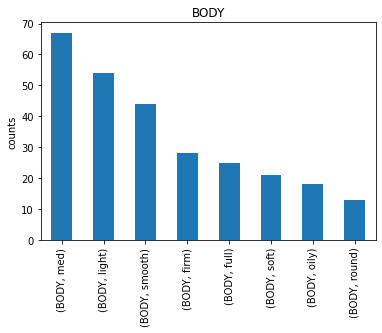

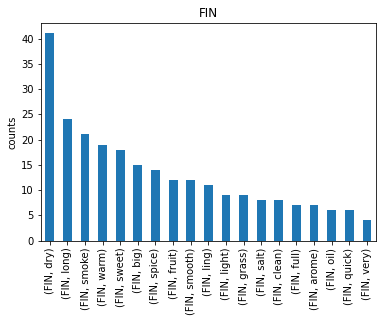

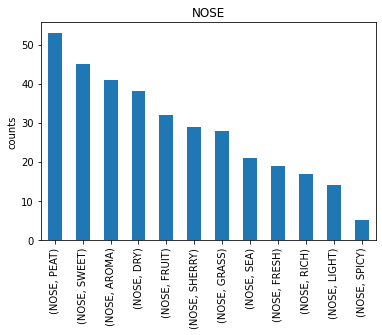

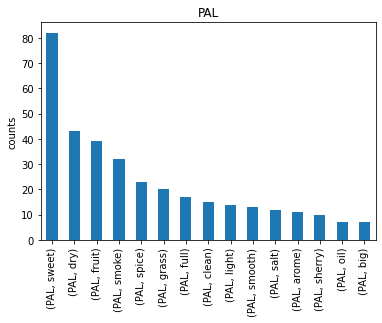

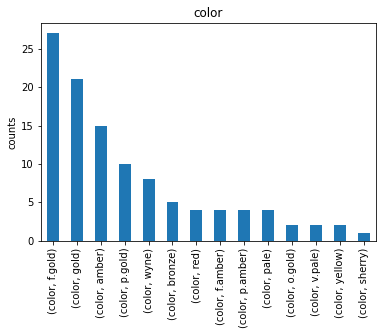

In [11]:
import matplotlib.pyplot as plt

for group_name, df_g in df.groupby(axis=1, level=0):
    if group_name != '':
        fig, ax = plt.subplots()
        df_g.sum(axis=0).sort_values(ascending=False).plot.bar(ax=ax)
        ax.set_title(group_name)
        ax.set_ylabel('counts')

## Horizontal distributions
It seems that each whisky can be described by multiple flags in one feature category, for instance: `Aberlour` in `BODY` is descibed by 5 sub-features (multilabeled).

In [12]:
df[['BODY']].head(5)

BODY                                      
                        soft med full round smooth light firm oily
Aberfeldy    Aberfeldy     1   1    0     0      0     0    0    0
Aberlour     Aberlour      1   1    1     1      1     0    0    0
Ardberg      Ardberg       0   1    1     0      0     1    1    0
Ardmore      Ardmore       0   0    1     0      0     0    0    0
Auchentoshan Auchentosh    1   0    0     0      0     0    0    0

Let's investigate sub-features distributions

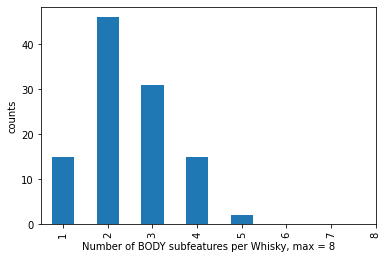

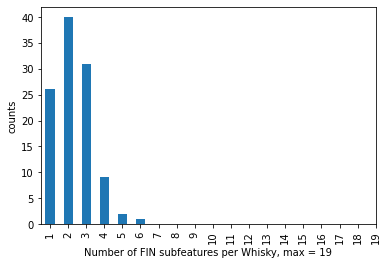

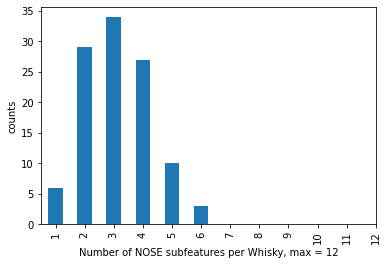

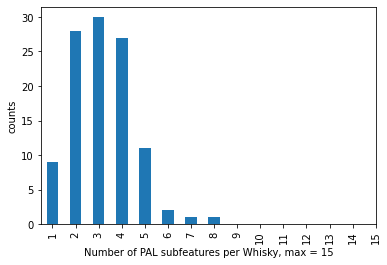

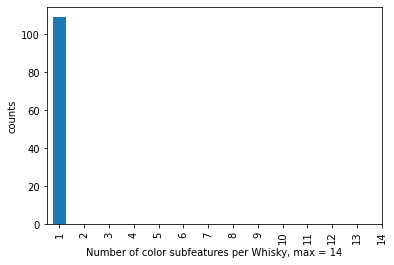

In [13]:
import numpy as np

for group_name, df_g in df.groupby(axis=1, level=0):
    if group_name != '':
        fig, ax = plt.subplots()
        df_g.sum(axis=1).value_counts().sort_index().plot.bar(ax=ax)
        max_feat = df_g.shape[1]
        ax.set_xlabel(f'Number of {group_name} subfeatures per Whisky, max = {max_feat}')
        ax.set_xticks(np.arange(0, max_feat))
        ax.set_xticklabels(np.arange(0, max_feat, 1) + 1)
        ax.set_ylabel('counts')

> There are whiskies where PAL (palate) is described by even 8 sub-features, more than half of all 15 possible. Very sophisticated taste!
>
> More about whisky tasting here https://en.wikipedia.org/wiki/Whisky_tasting
>
> However color is one-hot encoded 

# Features correlation

Let's check if there are any interesting patterns and correlations between features

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

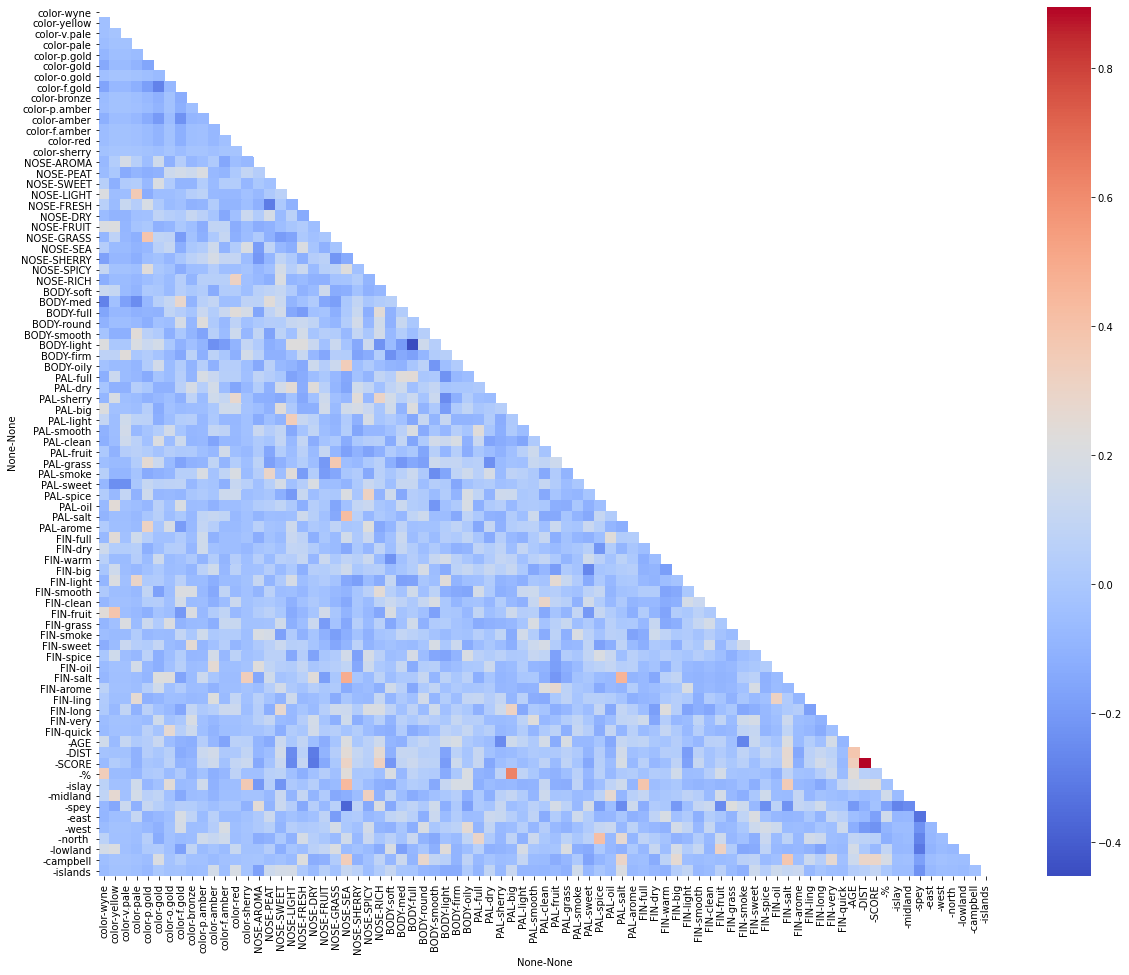

In [15]:
corr = df.corr()
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i <= j:
            corr.iloc[i, j] = None

fig, ax = plt.subplots(figsize = (20, 16))  
s = sns.heatmap(corr, ax=ax, cmap='coolwarm')

In [16]:
# default correlation method is pearson, however different methods could be considered (‘kendall’ or ‘spearman’)

In [17]:
corr

color                                                                                                                                        NOSE                                                                                                                    BODY                                                                             PAL                                                                                                                                                   FIN                                                                                                                                                                                                                                                                                                                    
                    wyne    yellow    v.pale      pale    p.gold      gold    o.gold    f.gold    bronze   p.amber     amber   f.amber       red    sherry     AROMA      PEAT     SWEET     LIGHT     FRESH       DRY     FRUIT     GRASS       SEA    SHERRY     SPICY      RICH      soft       med      full     round    smooth     light      firm      oily      full       dry    sherry       big     light    smooth     clean     fruit     grass     smoke     sweet     spice       oil      salt     arome      full       dry      warm       big     light    smooth     clean     fruit     grass     smoke     sweet     spice       oil      salt     arome      ling      long      very     quick       AGE      DIST     SCORE         %     islay   midland      spey      east      west    north    lowland  campbell islands
color wyne           NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN     NaN
      yellow   -0.038478       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN     NaN
      v.pale   -0.038478 -0.018692       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

## Top correlations

In [18]:
corr.reset_index().melt(id_vars=['level_0', 'level_1']).sort_values('value', ascending=False).head(10)

,level_0,level_1,variable_0,variable_1,value
5659,,SCORE,,DIST,0.895800
3068,,%,PAL,big,0.628700
1844,FIN,salt,NOSE,SEA,0.486923
3869,FIN,salt,PAL,salt,0.462982
1854,,islay,NOSE,SEA,0.441375
1829,PAL,salt,NOSE,SEA,0.422731
3722,,north,PAL,spice,0.414844
345,NOSE,GRASS,color,p.gold,0.395078
4041,,islay,FIN,full,0.389356
137,FIN,fruit,color,yellow,0.388703


Considering taste features: 
- salty FIN is correlated with salty PAL or NOSE SEA
- NOSE GRASS is correlated with gold color

The others are not very strong. Having domain knowledge and understanding relationships between variables one could also create bayesian network to investigate conditional probability of features.

# Define distance metric

To measure similarity between whiskies we need to define distance metric. Jaccard seems to be most promising for this use case, also Hamming is used as a second choice.

In [19]:
# checking distance metrics:
# Euclidean
# Cosine
# Jaccard
# Hamming

# euclidean distance might not be the best choice for categorical variables
# cosine distance does not work when vector is all 0

from scipy.spatial import distance

def dist(x1, x2):
    print(f'x1 = {x1}, x2 = {x2}')
    print(f'euclidean\t= {distance.euclidean(x1, x2)}')
    print(f'cosine\t\t= {distance.cosine(x1, x2)}')
    print(f'hamming\t\t= {distance.hamming(x1, x2)}')
    print(f'jaccard\t\t= {distance.jaccard(x1, x2)}')
    print('\n')
    
dist([1,0,0], [0,0,0])
dist([1,1,0], [0,1,1])
dist([1,1,1,1], [0,0,0,0])

x1 = [1, 0, 0], x2 = [0, 0, 0]
euclidean	= 1.0
cosine		= nan
hamming		= 0.3333333333333333
jaccard		= 1.0


x1 = [1, 1, 0], x2 = [0, 1, 1]
euclidean	= 1.4142135623730951
cosine		= 0.5
hamming		= 0.6666666666666666
jaccard		= 0.6666666666666666


x1 = [1, 1, 1, 1], x2 = [0, 0, 0, 0]
euclidean	= 2.0
cosine		= nan
hamming		= 1.0
jaccard		= 1.0




/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


# Finding similar whisky

In [20]:
import numpy as np

# for further analysis I choose only tasting features
df_feat = df.loc[:, ['BODY', 'NOSE', 'FIN', 'PAL', 'color']]

In [21]:
# selecting some random whisky
np.random.seed(7890)
selected = df_feat.sample(n=1)
selected

BODY                                        NOSE                                                               FIN                                                                                                    PAL                                                                                color                                                                                     
                  soft med full round smooth light firm oily AROMA PEAT SWEET LIGHT FRESH DRY FRUIT GRASS SEA SHERRY SPICY RICH full dry warm big light smooth clean fruit grass smoke sweet spice oil salt arome ling long very quick full dry sherry big light smooth clean fruit grass smoke sweet spice oil salt arome  wyne yellow v.pale pale p.gold gold o.gold f.gold bronze p.amber amber f.amber red sherry
Balblair Balblair    0   0    0     0      0     1    0    0     0    0     0     0     1   0     1     0   0      0     0    0    0   1    0   0     0      0     0     1     0     0     0     0   0    0     0    1    0    0     0    0   0      0   0     0      0     0     1     0     0     1     1   0    0     0     1      0      0    0      0    0      0      0      0       0     0       0   0      0

In [22]:
# calculating distances between selected whiskey and all the others
dist_jaccard = []
dist_hamming = []
for i, row in df_feat.iterrows():
    dist_jaccard.append(distance.jaccard(selected, row))
    dist_hamming.append(distance.hamming(selected, row))
df['dist_jaccard'] = dist_jaccard
df['dist_hamming'] = dist_hamming
df.sort_values('dist_jaccard')

color                                                                                       NOSE                                                              BODY                                        PAL                                                                                 FIN                                                                                                                                                                                                       dist_jaccard dist_hamming
                        wyne yellow v.pale pale p.gold gold o.gold f.gold bronze p.amber amber f.amber red sherry AROMA PEAT SWEET LIGHT FRESH DRY FRUIT GRASS SEA SHERRY SPICY RICH soft med full round smooth light firm oily full dry sherry big light smooth clean fruit grass smoke sweet spice oil salt arome full dry warm big light smooth clean fruit grass smoke sweet spice oil salt arome ling long very quick AGE DIST SCORE     % REGION   DISTRICT islay midland spey east west north  lowland campbell islands                          
Balblair    Balblair       1      0      0    0      0    0      0      0      0       0     0       0   0      0     0    0     0     0     1   0     1     0   0      0     0    0    0   0    0     0      0     1    0    0    0   0      0   0     0      0     0     1     0     0     1     1   0    0     0    0   1    0   0     0      0     0     1     0     0     0     0   0    0     0    1    0    0     0  10    3    76  40.0   HIGH      NORTH     0       0    0    0    0      1       0        0       0     0.000000     0.000000
Glenfiddich Glenfiddic     1      0      0    0      0    0      0      0      0       0     0       0   0      0     1    0     1     1     1   0     1     0   0      0     0    0    0   0    0     0      1     1    1    0    0   1      0   0     0      0     0     1     0     1     1     0   0    0     0    0   1    0   0     0      0     0     0     0     1     0     0   0    0     0    0    0    0     0  -9    3    75  40.0   HIGH       SPEY     0       0    1    0    0      0       0        0       0     0.611111     0.161765
Littlemill  Littlemill     1      0      0    0      0    0      0      0      0       0     0       0   0      0     0    1     1     0     0   0     0     0   0      0     0    0    1   1    0     0      0     1    0    0    0   0      0   0     0      0     0     0     0     0     1     0   0    0     0    0   1    0   0     0      1     0     1     0     0     0     0   0    0     0    0    0    0     0   8    4    83  43.0    LOW  NORTHWEST     0       0    0    0    0      0       1        0       0     0.666667     0.147059
Deanston    Deanston       0      0      0    1      0    0      0      0      0       0     0       0   0      0     0    0     1     0     1   1     0     0   0      0     0    0    0   0    0     0      1     1    0    0    0   0      0   0     0      0     0     1     0     0     1     0   0    0     0    0   1    0   0     1      0     0     0     0     0     0     0   0    0     0    0    0    0     0  -9    2    69  40.0   HIGH    MIDLAND     0       1    0    0    0      0       0        0       0     0.666667     0.147059
Ladyburn    Ladyburn       1      0      0    0      0    0      0      0      0       0     0       0   0      0     0    0     0     1     0   1     1     0   0      0     0    0    1   0    0     0      0     1    0    0    0   1      0   0     1      0     0     0     0     0     1     0   0    0     1    0   1    0   1     0      0     0     0     0     0     0     0   0    0     0    0    0    0     0  20    2    57  46.0    LOW       WEST     0       0    0    0    0      0       1        0       0     0.705882     0.176471
...                      ...    ...    ...  ...    ...  ...    ...    ...    ...     ...   ...     ...  ..    ...   ...  ...   ...   ...   ...  ..   ...   ...  ..    ...   ...  ...  ...  ..  ...   ...    ...   ...  ...  ...  ...  ..    ...  ..   ...    ...   ...  

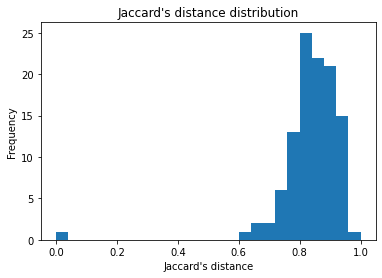

In [23]:
# histogram to support desicion how many similar whiskies can be taken, first bar on 0 distance represents selected whisky
ax = df['dist_jaccard'].plot.hist(bins=25)
xlab = ax.set_xlabel('Jaccard\'s distance')
t = ax.set_title('Jaccard\'s distance distribution')

In [24]:
# top 5 similar whiskies based on jaccard distance
df.sort_values('dist_jaccard').iloc[0:6]

color                                                                                       NOSE                                                              BODY                                        PAL                                                                                 FIN                                                                                                                                                                                                       dist_jaccard dist_hamming
                        wyne yellow v.pale pale p.gold gold o.gold f.gold bronze p.amber amber f.amber red sherry AROMA PEAT SWEET LIGHT FRESH DRY FRUIT GRASS SEA SHERRY SPICY RICH soft med full round smooth light firm oily full dry sherry big light smooth clean fruit grass smoke sweet spice oil salt arome full dry warm big light smooth clean fruit grass smoke sweet spice oil salt arome ling long very quick AGE DIST SCORE     % REGION   DISTRICT islay midland spey east west north  lowland campbell islands                          
Balblair    Balblair       1      0      0    0      0    0      0      0      0       0     0       0   0      0     0    0     0     0     1   0     1     0   0      0     0    0    0   0    0     0      0     1    0    0    0   0      0   0     0      0     0     1     0     0     1     1   0    0     0    0   1    0   0     0      0     0     1     0     0     0     0   0    0     0    1    0    0     0  10    3    76  40.0   HIGH      NORTH     0       0    0    0    0      1       0        0       0     0.000000     0.000000
Glenfiddich Glenfiddic     1      0      0    0      0    0      0      0      0       0     0       0   0      0     1    0     1     1     1   0     1     0   0      0     0    0    0   0    0     0      1     1    1    0    0   1      0   0     0      0     0     1     0     1     1     0   0    0     0    0   1    0   0     0      0     0     0     0     1     0     0   0    0     0    0    0    0     0  -9    3    75  40.0   HIGH       SPEY     0       0    1    0    0      0       0        0       0     0.611111     0.161765
Littlemill  Littlemill     1      0      0    0      0    0      0      0      0       0     0       0   0      0     0    1     1     0     0   0     0     0   0      0     0    0    1   1    0     0      0     1    0    0    0   0      0   0     0      0     0     0     0     0     1     0   0    0     0    0   1    0   0     0      1     0     1     0     0     0     0   0    0     0    0    0    0     0   8    4    83  43.0    LOW  NORTHWEST     0       0    0    0    0      0       1        0       0     0.666667     0.147059
Deanston    Deanston       0      0      0    1      0    0      0      0      0       0     0       0   0      0     0    0     1     0     1   1     0     0   0      0     0    0    0   0    0     0      1     1    0    0    0   0      0   0     0      0     0     1     0     0     1     0   0    0     0    0   1    0   0     1      0     0     0     0     0     0     0   0    0     0    0    0    0     0  -9    2    69  40.0   HIGH    MIDLAND     0       1    0    0    0      0       0        0       0     0.666667     0.147059
Ladyburn    Ladyburn       1      0      0    0      0    0      0      0      0       0     0       0   0      0     0    0     0     1     0   1     1     0   0      0     0    0    1   0    0     0      0     1    0    0    0   1      0   0     1      0     0     0     0     0     1     0   0    0     1    0   1    0   1     0      0     0     0     0     0     0     0   0    0     0    0    0    0     0  20    2    57  46.0    LOW       WEST     0       0    0    0    0      0       1        0       0     0.705882     0.176471
Aultmore    Aultmore       0      0      1    0      0    0      0      0      0       0     0       0   0      0     1    0     0     0     1   0     0     0   0      0     0    0    0   0    0     0      0     0    1    0    0   0      0   0     1      0     0  

# Common features for the selected and similar whiskies

Let's calculate Jaccard's distance in subspaces defined by feature groups. Then, let's calculate mean distance between selected whisky and the similar ones.

In [25]:
# calculate mean distance of each feature group
feat_distances = {}
for feat_group_name in ['BODY', 'NOSE', 'FIN', 'PAL', 'color']:
    feat_dist = []
    for i, row in df.sort_values('dist_jaccard').iloc[1:6].iterrows():
        feat_dist.append(distance.jaccard(selected[feat_group_name], row[feat_group_name]))
    feat_distances[feat_group_name] = np.mean(feat_dist)
feat_distances

{'BODY': 0.6666666666666666,
 'NOSE': 0.7533333333333333,
 'FIN': 0.6833333333333333,
 'PAL': 0.5866666666666667,
 'color': 0.4}

> The smallest mean distance divides the colors and then PAL in the second place. These 2 can be considered as common features for the whiski cluster.

# What is the difference between selected and the others

Comparing mean distance in subspaces between selected and the others will show what is really different in the selected whiskey

In [26]:
feat_distances = {}
for feat_group_name in ['BODY', 'NOSE', 'FIN', 'PAL', 'color']:
    feat_dist = []
    for i, row in df.sort_values('dist_jaccard').iloc[6:].iterrows():
        feat_dist.append(distance.jaccard(selected[feat_group_name], row[feat_group_name]))
    feat_distances[feat_group_name] = np.mean(feat_dist)
feat_distances

{'BODY': 0.8119741100323624,
 'NOSE': 0.8963476652797042,
 'FIN': 0.8776699029126214,
 'PAL': 0.724264139312683,
 'color': 0.9611650485436893}

> The longest distance here show the color and the NOSE. These are the unique features (in common sense) of the selected whisky.

# Conclusion 

- the data consists of 109 samples
- no data cleansing steps were necessary before analysis
- the data consists of multilabel features which are already encoded
- correlation analysis shows some obvious relationships (FIN: salt - NOSE: SEA)
- when the distance metric is defined we can find similar tastes in the data
- selected whisky can be perceived with very different color and nose
- next step could be clustering: calculate distance between each pair of whisky (109x109 matrix) and use some algoritm for defining clustes, for instance DBSCAN